# Data processing and Data engineering

---
To this end, we will obtain a data set that will be heavily involved in this project.

[**Output: L4_tro_df.csv**]

# Mount drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "drive/MyDrive/Colab Notebooks/asteroid_project"

/content/drive/MyDrive/Colab Notebooks/asteroid_project


# Dependencies

In [ ]:
import pandas as pd  # general purpose
import numpy as np  # general purpose
from matplotlib import pyplot as plt  # Use for EDA
from mpl_toolkits.mplot3d import Axes3D  # Use for EDA
from sklearn.preprocessing import StandardScaler  # Use in Standardization

# Load the Datasets

1. Notable asteroid families in L4 trojans include:

*   004_hector
*   005_eurybates
*   006_1996rj
*   008_arkesilaos

2. All asteroids in the Jupiter trojans (L4 & 5) data fetched from [astdys2](https://newton.spacedys.com/~astdys2/propsynth/tro.syn).

**Remark**: proper semi major axis are missing.






## Part 1

In [ ]:
dataset4_df = pd.read_csv('004_hector_data.csv', low_memory=False)
dataset5_df = pd.read_csv('005_eurybates_data.csv', low_memory=False)
dataset6_df = pd.read_csv('006_1996rj_data.csv', low_memory=False)
dataset8_df = pd.read_csv('008_arkesilaos_data.csv', low_memory=False)

In [ ]:
dataset4_df = dataset4_df[['Asteroid_ID', 'a', 'e', 'sin_i', 'H', 'Family_ID']]
dataset5_df = dataset5_df[['Asteroid_ID', 'a', 'e', 'sin_i', 'H', 'Family_ID']]
dataset6_df = dataset6_df[['Asteroid_ID', 'a', 'e', 'sin_i', 'H', 'Family_ID']]
dataset8_df = dataset8_df[['Asteroid_ID', 'a', 'e', 'sin_i', 'H', 'Family_ID']]

In [ ]:
# stack the dataframes together
families_df = pd.concat([dataset4_df, dataset5_df, dataset6_df, dataset8_df], ignore_index=True)

In [ ]:
families_df.head()

,Asteroid_ID,a,e,sin_i,H,Family_ID
0,624,5.29626,0.05419,0.32592,7.2,4
1,191028,5.30019,0.05585,0.32464,12.4,4
2,231623,5.29124,0.05467,0.32472,13.0,4
3,252159,5.28751,0.05154,0.32547,12.5,4
4,253382,5.28792,0.05635,0.32491,12.5,4


In [ ]:
print("Dimensions of families_df:", families_df.shape)

Dimensions of families_df: (274, 6)


In [ ]:
families_df['Asteroid_ID'] = families_df['Asteroid_ID'].astype(str)  # 123 to '123'

In [ ]:
dataset4_df['Asteroid_ID'] = dataset4_df['Asteroid_ID'].astype(str)  # 123 to '123'
dataset5_df['Asteroid_ID'] = dataset5_df['Asteroid_ID'].astype(str)  # 123 to '123'
dataset6_df['Asteroid_ID'] = dataset6_df['Asteroid_ID'].astype(str)  # 123 to '123'
dataset8_df['Asteroid_ID'] = dataset8_df['Asteroid_ID'].astype(str)  # 123 to '123'

## Part 2

In [ ]:
tro_df = pd.read_csv('tro.syn.csv', low_memory=False)

In [ ]:
L4_tro_df = tro_df[tro_df['L']==4]  # include only L4 trojans

In [ ]:
L4_tro_df = L4_tro_df[['Asteroid_ID', 'H', 'da', 'e', 'g("/y)', 'sin_i', 's("/y)']]

In [ ]:
# Create new binary columns in L4_tro_df to indicate membership in different asteroid families
# Each column is set to 1 if the 'Asteroid_ID' is present in the corresponding dataset, otherwise 0
L4_tro_df['is_family_004'] = L4_tro_df['Asteroid_ID'].isin(dataset4_df['Asteroid_ID']).astype(int)
L4_tro_df['is_family_005'] = L4_tro_df['Asteroid_ID'].isin(dataset5_df['Asteroid_ID']).astype(int)
L4_tro_df['is_family_006'] = L4_tro_df['Asteroid_ID'].isin(dataset6_df['Asteroid_ID']).astype(int)
L4_tro_df['is_family_008'] = L4_tro_df['Asteroid_ID'].isin(dataset8_df['Asteroid_ID']).astype(int)

In [ ]:
L4_tro_df['is_family'] = L4_tro_df['Asteroid_ID'].isin(families_df['Asteroid_ID']).astype(int)

In [ ]:
L4_tro_df.head(200)

,Asteroid_ID,H,da,e,"g(""/y)",sin_i,"s(""/y)",is_family_004,is_family_005,is_family_006,is_family_008,is_family
0,588,8.13,0.0314,0.1036,344.40,0.1969,-11.03,0,0,0,0,0
2,624,7.17,0.0877,0.0544,335.65,0.3259,-12.89,1,0,0,0,1
3,659,8.57,0.0493,0.1366,354.60,0.0857,-16.91,0,0,0,0,0
5,911,7.85,0.0777,0.0210,317.22,0.3863,-8.58,0,0,0,0,0
6,1143,8.31,0.0481,0.0522,365.40,0.0691,-10.91,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
310,22008,11.41,0.0777,0.0387,377.80,0.0522,-14.55,0,0,0,0,0
311,22009,11.54,0.0397,0.0248,364.28,0.0761,-9.28,0,0,0,0,0
312,22010,12.18,0.1152,0.0343,400.71,0.0148,-22.78,0,0,0,0,0
313,22012,11.66,0.0460,0.0906,358.77,0.1069,-12.51,0,0,0,0,0


from matplotlib import pyplot as plt
_df_0['H'].plot(kind='hist', bins=20, title='H')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['da'].plot(kind='hist', bins=20, title='da')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['e'].plot(kind='hist', bins=20, title='e')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['g("/y)'].plot(kind='hist', bins=20, title='g("/y)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='H', y='da', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='da', y='e', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='e', y='g("/y)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='g("/y)', y='sin_i', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['H'].plot(kind='line', figsize=(8, 4), title='H')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['da'].plot(kind='line', figsize=(8, 4), title='da')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['e'].plot(kind='line', figsize=(8, 4), title='e')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['g("/y)'].plot(kind='line', figsize=(8, 4), title='g("/y)')
plt.gca().spines[['top', 'right']].set_visible(False)

# Missing Data

Empirical data show that there is a **statistically significant** linear relationship between amplitude of oscillation in semi-major axis ($da$) and semi-major axis ($a$). It matches our physical understanding and intuition so I will use the following formula to compute semi-major axis given amplitude of oscillation:

$$a=1.0025⋅da+5.2077$$

The value 5.2077 AU can be interpreted as a baseline or reference point for the semi-major axis. This value is very close to the average semi-major axis of Jupiter, which is approximately 5.2 AU. This makes sense because the L4 Trojans are located at the Lagrange point 60° ahead of Jupiter in its orbit, meaning their orbits are closely linked to Jupiter's gravitational influence.

Morover, the slope implies that as the amplitude of oscillation increases by 1 AU, the average position of the asteroid's orbit also shifts outward by 1 AU, which is consistent with how gravitational perturbations can affect the orbits of L4 Trojans.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
a_df = families_df[['Asteroid_ID', 'a']]

In [ ]:
da_df = L4_tro_df[['Asteroid_ID', 'da']]

In [ ]:
merged_df = pd.merge(a_df, da_df, on='Asteroid_ID', how='inner')

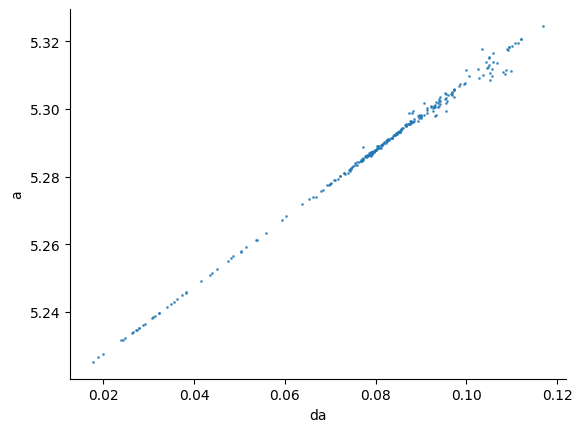

In [ ]:
merged_df.plot(kind='scatter', x='da', y='a', s=1, alpha=0.7)

plt.gca().spines[['top', 'right',]].set_visible(False)

## $a$ vs $da$

References: used chatgpt

Linear Regression Function: a = 1.0025 * da + 5.2077


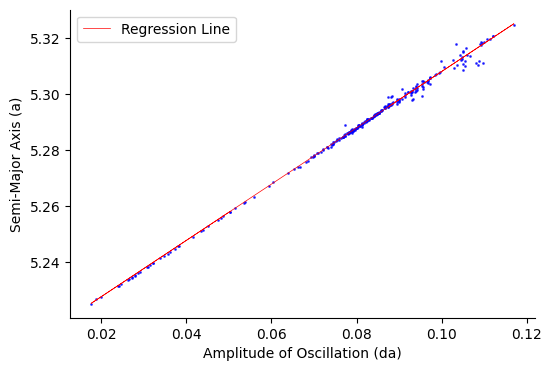

In [ ]:
X = merged_df[['da']].values  # Features (independent variable)
y = merged_df['a'].values      # Target (dependent variable)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the linear regression function
print(f'Linear Regression Function: a = {slope:.4f} * da + {intercept:.4f}')

# Generate predictions for the regression line
predictions = model.predict(X)

# Plotting
plt.figure(figsize=(6, 4))
merged_df.plot(kind='scatter', x='da', y='a', s=1, color='blue', alpha=0.7, ax=plt.gca())
plt.plot(merged_df['da'], predictions, color='red', linewidth=0.5, label='Regression Line')
# plt.title('Scatter Plot with Linear Regression Line')
plt.xlabel('Amplitude of Oscillation (da)')
plt.ylabel('Semi-Major Axis (a)')
plt.legend()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
import statsmodels.api as sm

# Prepare the data
X = merged_df[['da']]  # Features (independent variable)
y = merged_df['a']     # Target (dependent variable)

# Add a constant to the independent variable for intercept
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Print the summary, which includes p-values for slope and intercept
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      a   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.309e+04
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:32:26   Log-Likelihood:                 1453.0
No. Observations:                 274   AIC:                            -2902.
Df Residuals:                     272   BIC:                            -2895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2077      0.000   1.82e+04      0.0

In [ ]:
L4_tro_df['a'] = L4_tro_df['da'] * 1.0025 + 5.2077

In [ ]:
L4_tro_df = L4_tro_df[['Asteroid_ID', 'H', 'a', 'e', 'sin_i', 'g("/y)', 's("/y)',
                       'is_family_004', 'is_family_005', 'is_family_006', 'is_family_008', 'is_family']]

In [ ]:
L4_tro_df.head()

,Asteroid_ID,H,a,e,sin_i,"g(""/y)","s(""/y)",is_family_004,is_family_005,is_family_006,is_family_008,is_family
0,588,8.13,5.239179,0.1036,0.1969,344.40,-11.03,0,0,0,0,0
2,624,7.17,5.295619,0.0544,0.3259,335.65,-12.89,1,0,0,0,1
3,659,8.57,5.257123,0.1366,0.0857,354.60,-16.91,0,0,0,0,0
5,911,7.85,5.285594,0.0210,0.3863,317.22,-8.58,0,0,0,0,0
6,1143,8.31,5.255920,0.0522,0.0691,365.40,-10.91,0,0,0,0,0


# Output

In [ ]:
L4_tro_df.to_csv('L4_tro_df.csv', index=False)

In [ ]:
test_df = pd.read_csv('L4_tro_df.csv')

In [ ]:
test_df

,Asteroid_ID,H,a,e,sin_i,"g(""/y)","s(""/y)",is_family_004,is_family_005,is_family_006,is_family_008,is_family
0,588,8.13,5.239179,0.1036,0.1969,344.40,-11.03,0,0,0,0,0
1,624,7.17,5.295619,0.0544,0.3259,335.65,-12.89,1,0,0,0,1
2,659,8.57,5.257123,0.1366,0.0857,354.60,-16.91,0,0,0,0,0
3,911,7.85,5.285594,0.0210,0.3863,317.22,-8.58,0,0,0,0,0
4,1143,8.31,5.255920,0.0522,0.0691,365.40,-10.91,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3629,2016GX169,14.39,5.306045,0.0728,0.1895,354.97,-19.06,0,0,0,0,0
3630,2016GY236,13.77,5.242186,0.0338,0.1319,358.51,-8.62,0,0,0,0,0
3631,2016HQ11,14.19,5.319379,0.0565,0.1290,387.57,-22.11,0,0,0,0,0
3632,2016LO5,14.23,5.240081,0.0243,0.2671,338.78,-6.30,0,0,0,0,0
